In [1]:
# 1. Notwendige Bibliotheken importieren
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 2. Titanic-Datensatz laden
df = sns.load_dataset('titanic')

In [3]:
# 3. Erste Datenübersicht
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# 4. Allgemeine Informationen zum Datensatz
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
# 5. Beschreibende Statistik anzeigen
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# 6. Überlebensrate insgesamt
survival_rate = df['survived'].mean()
print(f"Die Gesamtüberlebensrate beträgt: {survival_rate:.2f}")

Die Gesamtüberlebensrate beträgt: 0.38


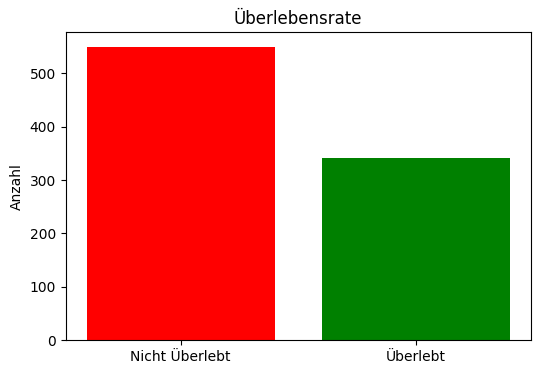

In [7]:
# Generelle Überlebensrate

plt.figure(figsize=(6,4))
bars = plt.bar(['Nicht Überlebt', 'Überlebt'], [df['survived'].value_counts()[0], df['survived'].value_counts()[1]], color=['red', 'green'])
plt.xticks(['Nicht Überlebt', 'Überlebt'])
plt.ylabel("Anzahl")
plt.title("Überlebensrate")

# Diagramm speichern als PNG
plt.savefig(r'C:\Users\Admin\OneDrive\Desktop\Praxisprojekt Titanic\titanic_analysis\results\survival_rate.png')

plt.show()


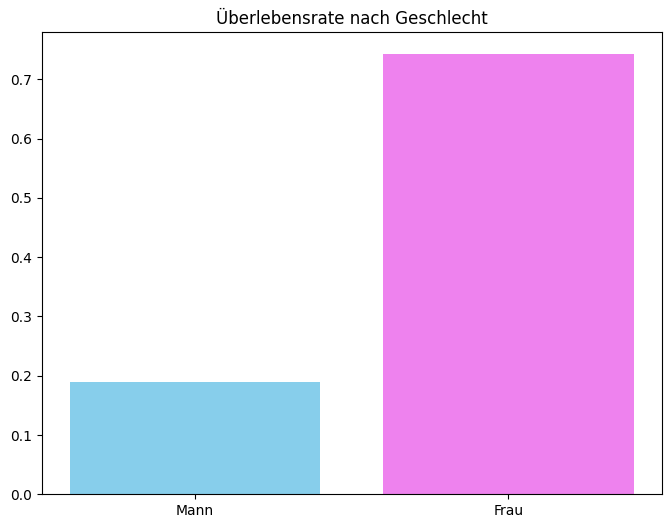

In [8]:
# 7. Visualisierung der Überlebensrate nach Geschlecht
plt.figure(figsize=(8, 6))
plt.bar(["Mann", "Frau"], [df.groupby("sex")["survived"].mean()["male"],df.groupby("sex")["survived"].mean()["female"]], color= ["skyblue","violet"])
plt.title('Überlebensrate nach Geschlecht')

# Diagramm speichern als PNG
plt.savefig(r'C:\Users\Admin\OneDrive\Desktop\Praxisprojekt Titanic\titanic_analysis\results\survival_rate_by_gender.png')

# Diagramm schließen
plt.show()

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(6, 6))

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, linewidths=1)
plt.show()


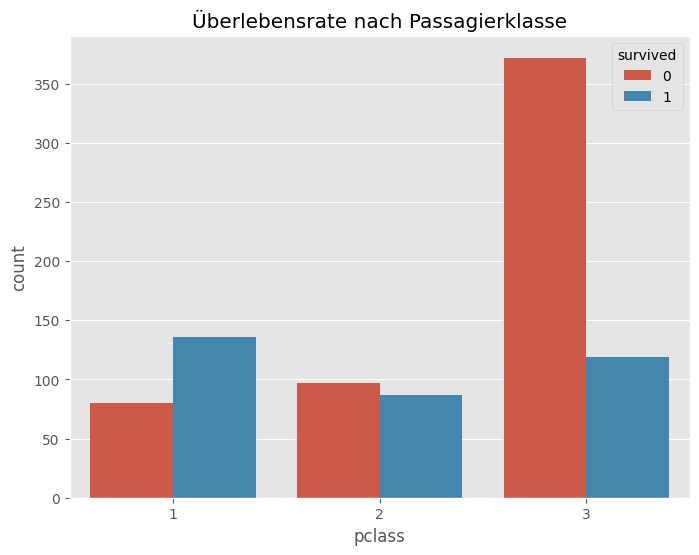

In [10]:
# Visualisierung der Überlebensrate nach Passagierklasse
plt.figure(figsize=(8, 6))
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Überlebensrate nach Passagierklasse')

# Diagramm speichern als PNG
plt.savefig(r'C:\Users\Admin\OneDrive\Desktop\Praxisprojekt Titanic\titanic_analysis\results\survival_rate_by_class.png')

# Diagramm schließen
plt.show()

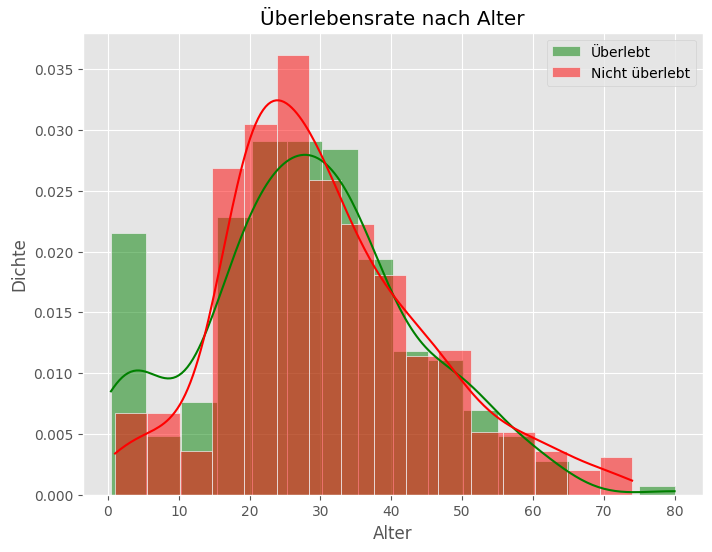

In [11]:
# Visualisierung der Überlebensrate nach Alter
plt.figure(figsize=(8, 6))
sns.histplot(df[df['survived'] == 1]['age'], kde=True, color='green', label='Überlebt', stat='density')
sns.histplot(df[df['survived'] == 0]['age'], kde=True, color='red', label='Nicht überlebt', stat='density')
plt.title('Überlebensrate nach Alter')
plt.xlabel('Alter')
plt.ylabel('Dichte')
plt.legend()

# Diagramm speichern als PNG
plt.savefig(r'C:\Users\Admin\OneDrive\Desktop\Praxisprojekt Titanic\titanic_analysis\results\survival_rate_by_age.png')

# Diagramm schließen
plt.show()

In [ ]:
"""with open(r"C:\Users\Admin\Documents\Woche_16_10.03.25-14.03.25\10.03.25\titanic_analysis\README.md") as file:
    content = file.read()

print(content)"""